In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from scipy.signal import savgol_filter
import matplotlib.colors
from scipy import integrate

plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [15]:
def getdata(string) : 
    rpath = r"../Absorption/"
    data = np.genfromtxt(rpath+string, skip_header=1, delimiter='\t')
    l = []
    i = []
    for ar in data : 
        if(ar[0] > 380 and ar[0] < 700) :
            l.append(ar[0])
            i.append(ar[1])
    
    window = 31
    
    si = savgol_filter(i, window, 2)
    imin = np.abs(np.min(si))
    nsi = list(map(lambda x: x + imin, si))
    
    return (l,nsi)

def plot(x) : 
    fig, ax = plt.subplots(dpi = x)
    return (fig, ax)
    
def wavelength_to_rgb(wavelength, gamma=0.8):
    
    wavelength = float(wavelength)
    if wavelength > 380 and wavelength < 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

clim=(350,780)

def visiblelight(ax) : 
    norm = plt.Normalize(*clim)

    wl = np.arange(clim[0],clim[1]+1,2)
    colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
    spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

    wavelengths = np.linspace(380, 700, 1000)
    spectrum = [3]*1000
    ax.plot(wavelengths, spectrum, color='w')

    y = np.linspace(0, 3, 100)
    X,Y = np.meshgrid(wavelengths, y)

    extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

    ax.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto', alpha=0.35)
    
    ax.fill_between(wavelengths, spectrum, 8, color='w')
    
    return 1
    
    

['B1.txt', 'B2.txt', 'B3.txt', 'B4.txt', 'G1.txt', 'G2.txt', 'G3.txt', 'G4.txt', 'R1.txt', 'R2.txt', 'R3.txt', 'R4.txt']


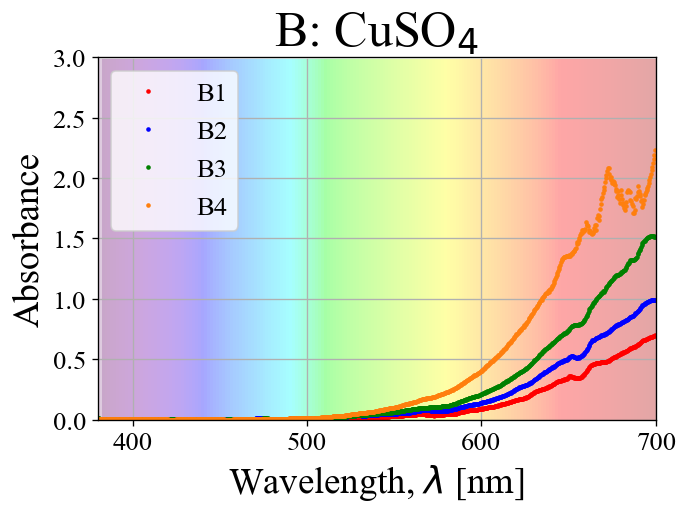

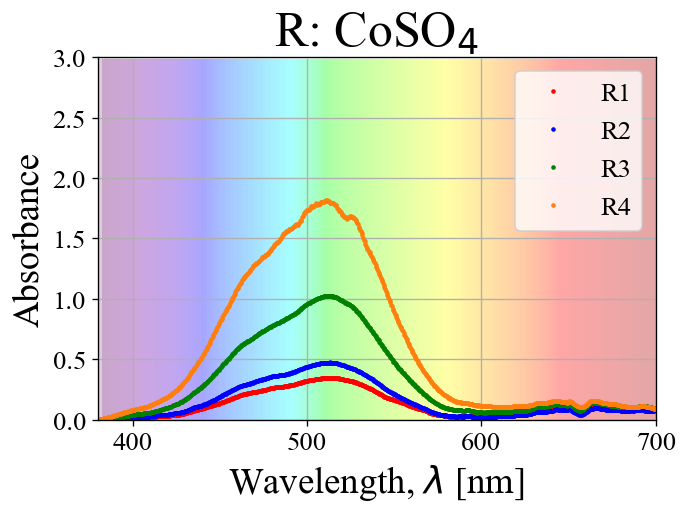

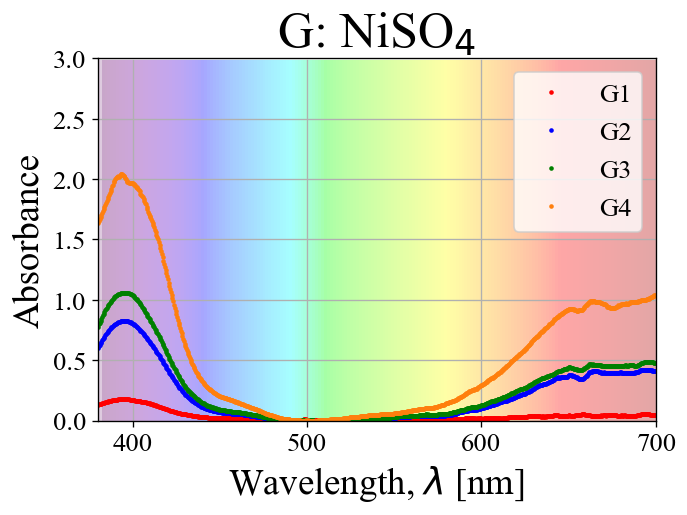

In [18]:
slist = listdir(r"../Absorption/")
print(slist)

bint = []
rint = []
gint = []

dp = 120
f1, a1 = plot(dp)
f2, a2 = plot(dp)
f3, a3 = plot(dp)

collist = ["r", "b", "g", "tab:orange"]
#["tab:blue", "tab:green", "tab:red", "tab:orange"] 
#["#c1272d", "#0652ff", "#eecc16", "#e17701"]

mopt = ['.', 3.5, 30]

for name in slist : 
    if(name[0] == "B" or name[2] == "n") :
        l, i = getdata(name)
        a1.plot(l, i, mopt[0], markersize = mopt[1], color=collist[int(name[1])-1], label=name[0]+name[1])
        a1.set_title("B: CuSO$_4$", size = mopt[2])
        bint_list = integrate.cumulative_trapezoid(i, l, initial=0)
        defint = bint_list[-1] - bint_list[1]
        bint.append(defint)
        
    if(name[0] == "R") :
        l, i = getdata(name)
        a2.plot(l, i, mopt[0], markersize = mopt[1], color=collist[int(name[1])-1], label=name[0]+name[1])
        a2.set_title("R: CoSO$_4$", size = mopt[2])
        rint_list = integrate.cumulative_trapezoid(i, l, initial=0)
        defint = rint_list[-1] - rint_list[1]
        rint.append(defint)
        
    if(name[0] == "G") :
        l, i = getdata(name)
        a3.plot(l, i, mopt[0], markersize = mopt[1], color=collist[int(name[1])-1], label=name[0]+name[1])
        a3.set_title("G: NiSO$_4$", size = mopt[2])
        gint_list = integrate.cumulative_trapezoid(i, l, initial=0)
        defint = gint_list[-1] - gint_list[1]
        gint.append(defint)

for a in [a1, a2, a3] : 
    a.set_xlabel("Wavelength, $\lambda$ [nm]", size=22)
    a.set_ylabel("Absorbance", size = 22)
    a.grid()
    a.legend()
    visiblelight(a)
    a.set_ylim(0,3)
        
def savefig(flist, form) : 
    namel = ["CuSO4", "CoSO4", "NiSO4"]
    for i, f in enumerate(flist) : 
        f.savefig("{}.{}".format(namel[i], form), format="{}".format(form), bbox_inches="tight")

#savefig([f1,f2,f3], "svg")
    

In [29]:
#print(bint)
#print(rint)
#print(gint)

def ratio(list_, first, last) :
    return list_[last]/list_[first]

fl = []
sl = []
tl = []

for liste in [bint, rint, gint] : 
    fl.append(ratio(liste, 0, -1))
    sl.append(ratio(liste, 1, -1))
    tl.append(ratio(liste, 2, -1))

print(fl)
print(sl)
print(tl)


[3.637559816979565, 4.677178836538385, 14.187680158830897]
[2.449258382307318, 3.810315629534865, 2.553689375244938]
[1.6455539800572951, 1.777809165661818, 2.0718222556221653]


In [ ]:

fig, axs = plt.subplots(1, 1, figsize=(8,4), tight_layout=True)

wavelengths = np.linspace(380, 700, 1000)
spectrum = [1]*1000
plt.plot(wavelengths, spectrum, color='darkred')

y = np.linspace(0, 6, 100)
X,Y = np.meshgrid(wavelengths, y)

extent=(np.min(wavelengths), np.max(wavelengths), np.min(y), np.max(y))

plt.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')

plt.fill_between(wavelengths, spectrum, 8, color='w')